# Project Group - 20

##### Members:   
1. Chen, Tangzhe 5814162
2. Li, Mingsong 5967115
3. Zhang, Yuteng 5721903
4. Zhang, Yunjie 5702704
5. Zhang, Ke 5690226

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

1. **Processing and visualising the data** of daily new cases of COVID-19 in the Netherlands since the beginning of the pandemic and number of aircraft arrivals and departures in Amsterdam airport Schiphol from January 2019 to August 2022.  
2. **Inquiring the measures** issued by the Dutch government regarding the pandemic and the notifications issued by Amsterdam airport Schiphol since the pandemic began.  
3. Combining the results of the first two objectives, **analysing** how covid affected the aircraft arrivals and departures in Amsterdam airport Schiphol.

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Zhang Ke & Chen Tangzhe**: Flight data processing and visual programming

**Li Mingsong**: Epidemic data visualization programming

**Zhang Yuteng & Zhang Yunjie**: Code explanation, analysis and discussion

## *Import Libraries*

In [1]:
import pandas as pd
import plotly.express as px
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation

# Data Used

In this project, we got the [crowdsourced air traffic data](https://zenodo.org/record/7065179#.Y15UVhbMK3A/) and [covid-19 data](https://github.com/owid/covid-19-data/tree/master/public/data) from website. 

The flight data contains the daily information of different types of flights  with different origins and destinations.

In [19]:
file_location = "C:\\Users\\zyj\\Desktop\\flightlist_20200401_20200430.csv"
df_2 = pd.read_csv(file_location)
df_2.head()

callsign number  icao24 registration typecode origin destination  \
0  HBAL102    NaN  a21c0f          NaN      NaN    NaN         NaN   
1  AUA1028    NaN  440081       OE-LPD     B772   YSSY        LOWW   
2   ABW120    NaN  424564       VQ-BRJ     B748   KORD        UUEE   
3   CSN461  CZ461  780da8       B-2026     B77L   KLAX        EDDF   
4  ETH3730    NaN  04015c          NaN      NaN   OMSJ        EBLG   

                   firstseen                   lastseen  \
0  2020-03-31 00:41:44+00:00  2020-04-01 22:50:47+00:00   
1  2020-03-31 03:29:15+00:00  2020-04-01 00:41:43+00:00   
2  2020-03-31 07:07:17+00:00  2020-04-01 12:54:29+00:00   
3  2020-03-31 07:15:52+00:00  2020-04-01 12:02:53+00:00   
4  2020-03-31 08:05:10+00:00  2020-04-01 01:15:08+00:00   

                         day  latitude_1  longitude_1  altitude_1  latitude_2  \
0  2020-04-01 00:00:00+00:00   -4.821136   -76.319370     18288.0   -4.524902   
1  2020-04-01 00:00:00+00:00  -33.963489   151.180630         0.0   48.117417   
2  2020-04-01 00:00:00+00:00   41.965911   -87.883152         0.0   55.983490   
3  2020-04-01 00:00:00+00:00   33.936302  -118.413963         0.0   50.035675   
4  2020-04-01 00:00:00+00:00   25.386425    55.422139       609.6   50.634247   

   longitude_2  altitude_2  
0   -79.010274     2194.56  
1    16.549988         NaN  
2    37.495839      472.44  
3     8.572299       45.72  
4     5.439027       76.20

The  covid-19 data contains data on the number of people that were infected in different countries and regions of the world.

In [20]:
file_place = "C:\\Users\\zyj\\Desktop\\owid-covid-data.csv"
df = pd.read_csv(file_place)
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

It can be seen that the data contains a lot of information that is not used in this project, and some data is missing. Therefore, in the following steps, we will process the data according to the research objective so as to facilitate the subsequent analysis.

# Data Prerocessing

In data preprocessing, for flight data, we first created two empty data frames for arr and dep to store arrival and departure data. We then screened all flights destined for EHAM, which is the code name for Schiphol airport. Then we added the airline labels. Because we are looking at the impact of the pandemic on travellers, we deleted the cargo airline. We also deleted the airlines whose destination and origin are both EHAM. Since the other data are redundant, we only selected 'callsign', 'origin', 'destination', 'day', and 'sign' for research.  
The same is true for departure, only this time the origin of the screening is EHAM. For the pandemic data, we selected data from the Netherlands.

The code that were used to preprocessing the flight data is:  
```
# Create arrive and departure data frame
arr=pd.Series([None])
dep=pd.Series([None])

# Data preprocessing
file_path="F:\\python project data\\python_final_assignment\\dataname.txt"

with open(file_path,'r') as fp:
    for name in fp:

        print("Reading file:" + name)

        dataimport = pd.read_csv(name.rstrip())

        # Arrival data
        arr_eham=dataimport.loc[dataimport['destination']=='EHAM']
        # Add airline labels
        arr_eham['sign']=''
        arr_eham['sign']=arr_eham['callsign'].apply(lambda r:r[0:3])
        # Delete cargo airline
        arr_eham=arr_eham.loc[~((arr_eham["sign"]==("GTI"))|(arr_eham["sign"]==("CLX"))|(arr_eham["sign"]==("GEC"))|(arr_eham["sign"]==("FDX"))|(arr_eham["sign"]==("UPS")))]
        # Delete wrong data
        arr_eham=arr_eham.loc[~((arr_eham["origin"]==("EHAM"))&(arr_eham["destination"]==("EHAM")))]
        # Filter date and other columns
        arr_eham=arr_eham[['callsign','origin','destination','day','sign']]
        arr_eham['day']=arr_eham['day'].apply(lambda r:r[0:10])

        # Departure data
        dep_eham=dataimport.loc[dataimport['origin']=='EHAM']
        # Add airline labels
        dep_eham['sign']=''
        dep_eham['sign']=dep_eham['callsign'].apply(lambda r:r[0:3])
        # Delete cargo airline
        dep_eham=dep_eham.loc[~((dep_eham["sign"]==("GTI"))|(dep_eham["sign"]==("CLX"))|(dep_eham["sign"]==("GEC"))|(dep_eham["sign"]==("FDX"))|(dep_eham["sign"]==("UPS")))]
        # Delete wrong data
        dep_eham=dep_eham.loc[~((dep_eham["origin"]==("EHAM"))&(dep_eham["destination"]==("EHAM")))]
        # Filter date and other columns
        dep_eham=dep_eham[['callsign','origin','destination','day','sign']]
        dep_eham['day']=dep_eham['day'].apply(lambda r:r[0:10])

        arr = pd.concat([arr, arr_eham])
        print("Finish arr!")

        dep = pd.concat([dep, dep_eham])
        print("Finish dep!")

# Finish data preprocessing
print("Finish All！！！")

# Save data in .csv
arr.to_csv("F:\\python project data\\final data\\arr.csv")
dep.to_csv("F:\\python project data\\final data\\dep.csv")
```

# Data Visualisation

For flight data, after importing data, for separate operations on arrival and departure data, we group the data by date, the same date as a group, and calculate the number of flights in each group. After resetting the index, we added a new dimension called “direction” to arr and dep respectively, which acts as a label in visualising. Then we concatenate two dataframe and visualise them. The x-axis represents dates, and the y-axis represents the number of arrived and departed flights respectively. 

In [2]:
# Data import
dataarr = pd.read_csv(r"C:\Users\ayton\Desktop\arr.csv")
datadep = pd.read_csv(r"C:\Users\ayton\Desktop\dep.csv")
# Count
datagroup_arr=dataarr.groupby(["day"]).count()
datagroup_dep=datadep.groupby(["day"]).count()
# Integrate data
datagroup_arr=datagroup_arr.reset_index()
datagroup_dep=datagroup_dep.reset_index()
datagroup_arr["direction"]="arr"
datagroup_dep["direction"]="dep"
data=pd.concat([datagroup_arr,datagroup_dep])
# plot
fig = px.line(
    data, x="day", y=["sign"],color="direction",
    markers=False
)
fig.show()

For COVID case data, the x-axis represents dates, and the y-axis represents the number of newly infected people.

In [23]:
# As already wrote previously
#file_place = "C:\\Users\\zyj\\Desktop\\owid-covid-data.csv"
#df = pd.read_csv(file_place)

In [24]:
df_nld = df[(df.iso_code=='NLD')]

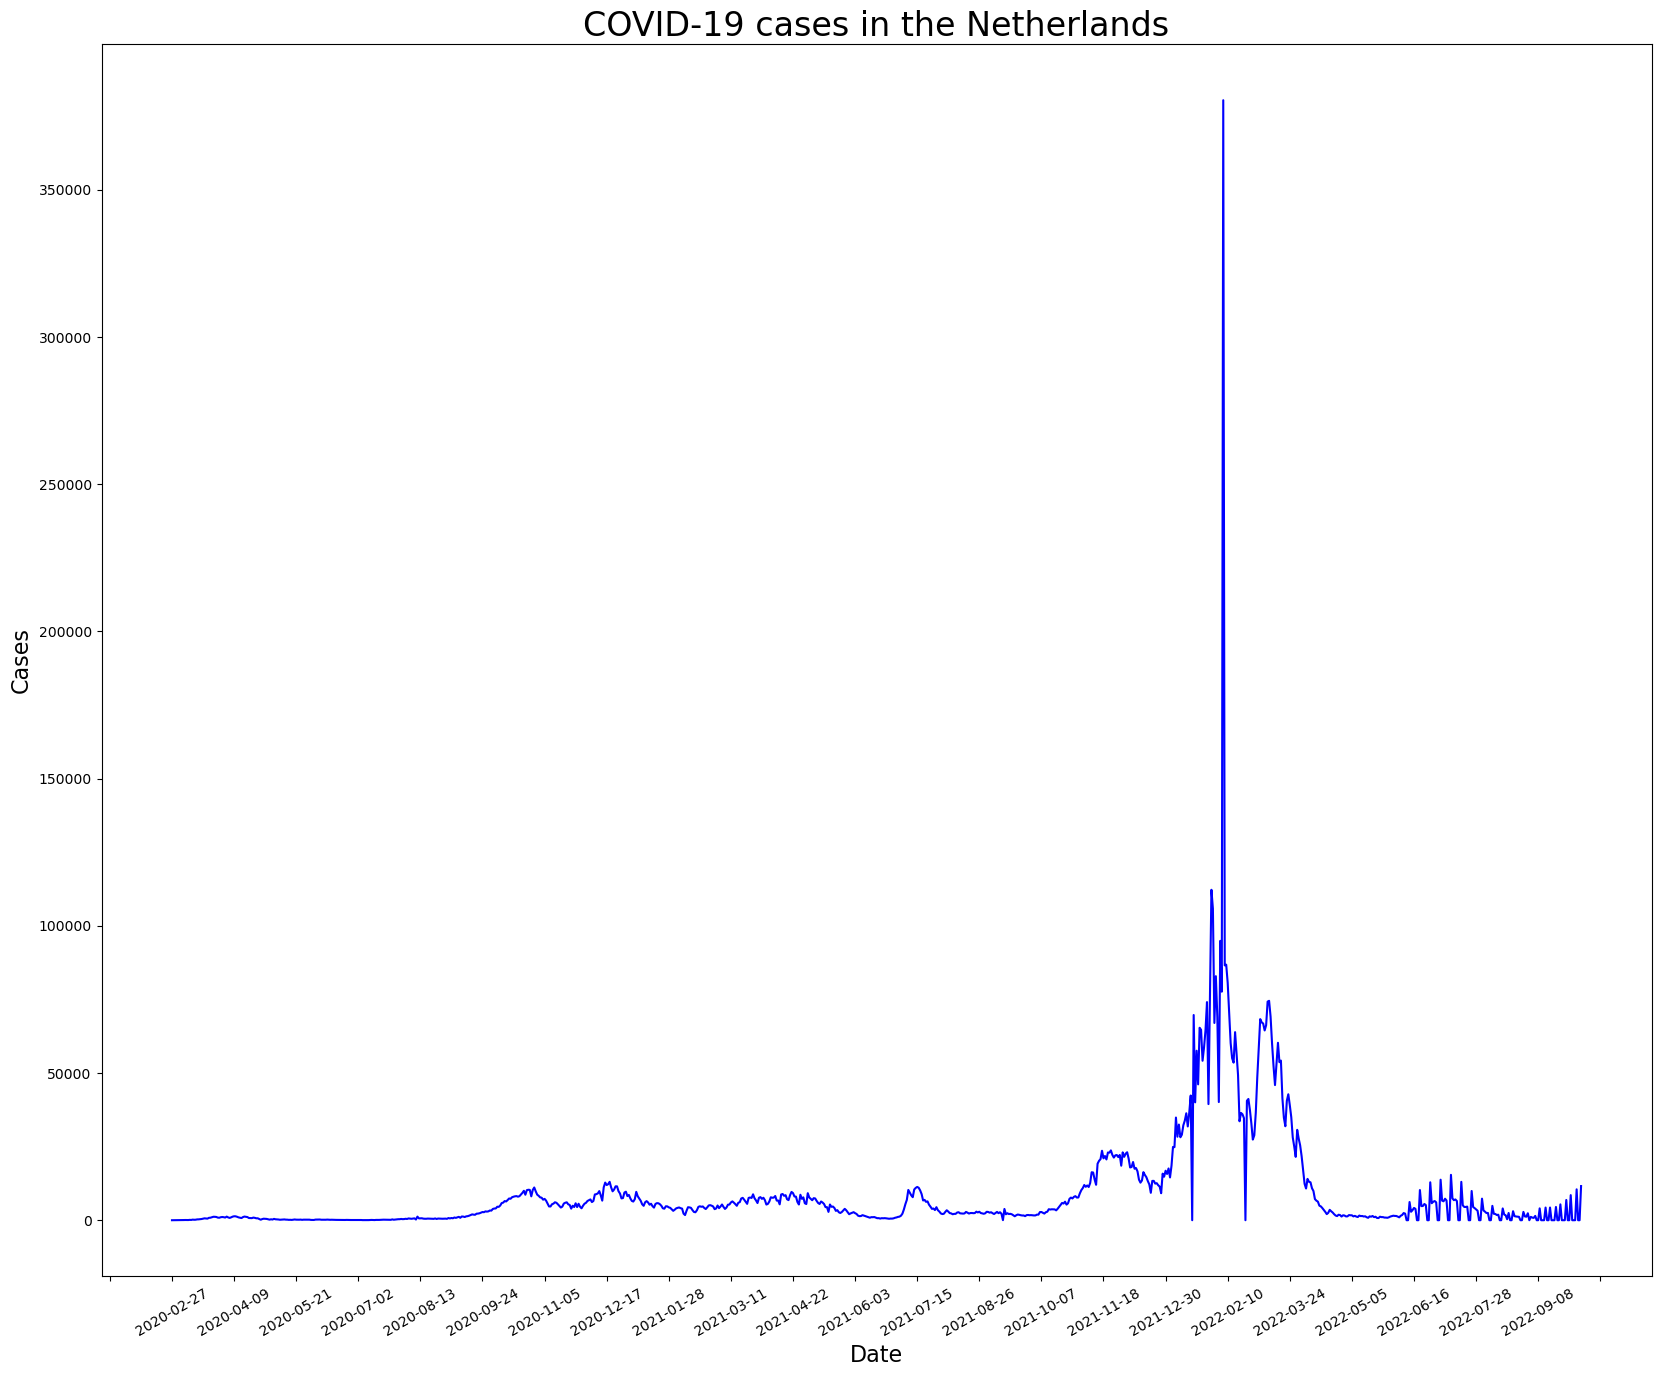

In [25]:
x = df_nld['date']

plt.plot(x, df_nld['new_cases'], 'blue', label='total cases')

ax = plt.gca()
from matplotlib.pyplot import MultipleLocator
x_major_locator = MultipleLocator(42)
ax.xaxis.set_major_locator(x_major_locator)

plt.title('COVID-19 cases in the Netherlands', fontsize = 24)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Cases', fontsize = 16)
plt.rcParams['figure.figsize'] = (20.0, 16.0)
plt.xticks(rotation=30)

plt.show()

# Analysis and Discussion

By inquiring the notifications from [Schiphol](https://www.schiphol.nl/en/messages/coronavirus-update) and policies from [government of the Netherlands](https://www.government.nl/topics/coronavirus-covid-19/news), we analysed the  reasons behind the changes in the data.

From the flight data, we could derive that from about the beginning of March, the number of flights began to decrease dramatically. This is mainly because the Netherlands first suspended flights to Italy from March 9 and then cancelled flights with six risk countries. KLM and Transavia cancelled a large number of flights, which involve more countries. Those kinds of measures lasted until June 15th, then Dutch government allowed intra-european travel. And on July 1, 2020, Travellers from 15 non-EU countries could enter the Netherlands again. However, since August, the government has introduced a travel ban on some European and non-European countries again, which includes travel bans on Spain, South Africa, and the United Kingdom. And from December 14th, the Netherlands began to lock down until mid-March of the following year. Due to the introduction of vaccines, most flights are beginning to resume. The increase in flights continued until the end of 2021, with a brief decrease in the number of flights due to the emergence of Omicron at that time. After that, it gradually recovered until it fully returned to normal on March 22, 2022.

Combining with more detailed policies and covid-19 data, it is possible to dive deeper in chronological order.

By May 2020, the epidemic was well under control, so the Dutch government relaxed travel policies and a growing number of European countries opened their borders to Dutch tourists. As a result, the number of flights started to rise again during this period. It is worth noting that in the line chart of the number of flights, there was a sharp increase at the end of June 2020, which was related to the announcement of the government's [financial support to KLM](https://www.government.nl/topics/coronavirus-covid-19/news/2020/06/26/government-offers-financial-support-to-klm-as-a-result-of-the-corona-crisis) on June 26, 2020 .

However, due to the epidemic in neighbouring countries, the Netherlands reinstated the travel ban for some countries in early August 2020, which has been reflected in the reduction in the number of flights since then.

Due to the timely measures taken by the Dutch government to control the spread of the covid-19, the number of new daily cases in the Netherlands remained at a low level until an increase occurred in October 2020. As a result, the Dutch government introduced the lockdown from early November 2020 until early April 2021. As can be seen from the line chart of daily new cases, this measure has achieved good results, as the growth trend of daily new cases has been restrained and achieved dynamic stability at a low level.

Then, as the pandemic improved, the Dutch government planned to [open the society](https://www.government.nl/topics/coronavirus-covid-19/news/2021/04/13/plan-to-reopen-society-step-by-step) step by step in early April 2021 and replaced the flight ban by self-quarantine and two negative test result requirements in June. As a result, the number of flights rised again in April 2021 and grew at a higher rate in June.

As can be seen from the line graph of daily new cases, the number of new cases increased sharply from December 2021. As a result, on December 18, 2021, the Dutch government imposed the lockdown once again to slow the spread of the Omicron variant. As a result of effective measures, the number of new cases per day has decreased. Therefore, on February 15, 2022 the Netherlands reopened step by step. From 25 February, travellers arriving in the Netherlands will no longer be required to self-quarantine. This is reflected in flight data, which began to decline in December 2021 and then gradually recovered to pre-pandemic levels from February 2022.

All in all, the number of new cases will affect government policy, which in turn will affect the number of new cases, and the interaction between the two will be reflected in the number of flights.

